# Which Games will be Successful

# Table of Contents
- [Ice Game Store (Integrated Project 1)](#scrollTo=nH9YPchgebbF)

- [Memuat library](#scrollTo=c-i3SlleebbZ)

    - [Data Initialization](#scrollTo=I7nqTeeCebcB)

    - [Data Preprocessing](#scrollTo=hhRJOfjTebcT)

        - [Mengganti nama kolom dan register dari setiap value di dalam kolom](#scrollTo=mFFoq--_ebcW)

        - [Mengkonversikan Tipe Data pada Kolom](#scrollTo=qiisSIxZebc0)

        - [Mengisi missing value](#scrollTo=wQTyrBUUebc4)

            - [Mengisi missing value kolom name dan genre](#scrollTo=vmpyrCNYebc6)

            - [Mengisi missing value kolom release_year](#scrollTo=BO_NvP5nebdF)

            - [Mengisi missing value kolom critic_score  dan user_score](#scrollTo=eeeW6UD9ebdb)

            - [Mengisi missing value kolom rating](#scrollTo=FsimZKK_ebd8)

        - [Mengubah tipe data release_year menjadi datetime](#scrollTo=-X3G6Q_CebeH)

        - [Calculate the total_sales](#scrollTo=_7aSVMd4ebeK)

    - [Data Analysis](#scrollTo=9kox6x8cebeO)

        - [The Number of Games Released per Year](#scrollTo=REnIEOzzebeP)

        - [Variasi Penjualan tiap Platform](#scrollTo=eYDhKOeGebeZ)

            - [Memfilter 6 platform teratas](#scrollTo=UPcoieMZebed)

        - [Menentukan Data untuk Tahun Acuan 2017](#scrollTo=0mXQ0MJXebfB)

        - [Menampilkan Boxplot dari Penjualan Games tiap Platform](#scrollTo=UCzxsM_2ebfL)

        - [Menganalisa Apakah Ulasan Pengguna dan Kritikus Memengaruhi Penjualan dari Suatu Game](#scrollTo=npifrabGebff)

        - [Membandingkan Penjualan Game yang sama antar Platform](#scrollTo=TERqfZM7ebf2)

        - [Distribusi Game Berdasarkan Genre](#scrollTo=FeIxeWt0ebgA)

    - [Pemfrofilan untuk masing-masing Wilayah](#scrollTo=i8MWcQqIebgP)

        - [Menentukan 5 Platform teratas masing-masing Region](#scrollTo=xZpxZ9FhebgS)

            - [5 Platform teratas Region NA](#scrollTo=OLTB5IJzebgT)

            - [5 Platform teratas Region EU](#scrollTo=zQtTWJ6TebgW)

            - [5 Platform teratas Region JP](#scrollTo=SFrk6xZYebgg)

            - [Variasi Market Shares Platform](#scrollTo=yLwOLLEfebgj)

        - [Top 5 Genre di masing-masing Wilayah](#scrollTo=dLJbmmBlebgn)

            - [Top 5 Genre Region NA](#scrollTo=hXyBDv8jebgu)

            - [Top 5 Genre Region EU](#scrollTo=FhL0bBeVebgy)

            - [Top 5 Genre Region JP](#scrollTo=xpfK7KDvebg1)

            - [Variasi Market Shares Genre](#scrollTo=snf_8KrYebg3)

        - [Top Rating di masing-masing Wilayah](#scrollTo=sufx8v3oebhF)

            - [Top Rating Region NA](#scrollTo=OuPTfeD-ebhG)

            - [Top Rating Region EU](#scrollTo=IcmKpsN4ebhI)

            - [Top Rating Region JP](#scrollTo=mMaTjhN2ebhP)

            - [Variasi Market Shares Rating](#scrollTo=kJ8M1akLebhS)

    - [Uji Hipotesis](#scrollTo=SU94eptuebhV)

        - [Rata-rata rating pengguna platform Xbox One dan PC adalah sama](#scrollTo=8n9yQ34XebhW)

        - [Rata-rata rating pengguna genre Action dan Sports berbeda](#scrollTo=M2v8hWvhebhl)

    - [Consclusion](#scrollTo=_WU5sWAzebhz)



# Ice Game Store (Integrated Project 1)

Kami bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Kami perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Kami bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

Kami memiliki data dari tahun 2016. Kami membayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan kami sedang merencanakan kampanye untuk tahun 2017.

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

**Goals :**
- Mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak.
- Menemukan variasi penjualan tiap platform game, kapan suatu platform baru muncul, bertumbuh, dan menurun popularitasnya.
- Menentukan periode pengambilan data untuk meramalkan penjualan di tahun 2017.
- Menentukan platform mana yang menghasilkan penjualan terbanyak, dan platform mana yang menghasilkan keuntungan paling tinggi.
- Menemukan apakah ulasan kritikus dan ulasan pengguna dapat memengaruhi penjualan dari suatu platform.
- Menemukan genre yang paling menguntungkan.
- Menemukan karakteristik pengguna berdasarkan platfrom, genre, dan rating, apakah memengaruhi penjualan dari suatu game.

**Uji Hipotesis :**
- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.

# Memuat library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import re
!pip install sidetable 
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Initialization

In [ ]:
# Load dataset
df = pd.read_csv('/content/games.csv')
sns.set()

**Deskripsi Data:**
- Name (nama)
- Platform
- Year_of_Release (tahun rilis)
- Genre
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

Data untuk tahun 2016 mungkin tidak lengkap

In [ ]:
# Menampilkan sample data
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2855,MX vs. ATV Reflex,X360,2009.0,Racing,0.52,0.14,0.00,0.06,75.0,6.6,E
15173,RayCrisis: Series Termination,PS,1999.0,Shooter,0.01,0.01,0.00,0.00,67.0,tbd,E
8334,Jikkyou Powerful Pro Yakyuu 2013,PSP,2013.0,Sports,0.00,0.00,0.17,0.00,NaN,NaN,NaN
5511,Parodius,PS,1994.0,Shooter,0.00,0.00,0.31,0.02,NaN,NaN,NaN
12839,Cabela's Big Game Hunter 2005 Adventures,GBA,2004.0,Sports,0.04,0.01,0.00,0.00,NaN,NaN,NaN
7365,SingStar Pop Edition,PS3,2009.0,Misc,0.00,0.18,0.00,0.03,NaN,NaN,NaN
13063,Princess on Ice,DS,2008.0,Sports,0.04,0.01,0.00,0.00,NaN,tbd,E
10776,Global Touring Challenge: Africa,PS2,2001.0,Racing,0.05,0.04,0.00,0.01,64.0,tbd,E
15292,Steal Princess,DS,NaN,Platform,0.02,0.00,0.00,0.00,60.0,tbd,E10+
15332,Mata Hari: Betrayal is only a Kiss Away,PC,2008.0,Adventure,0.00,0.02,0.00,0.00,63.0,NaN,T


In [ ]:
# Menampilkan ukuran dataset
df.shape

(16715, 11)

In [ ]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Dari informasi diatas kita mendapatkan beberapa gambaran:
- Dataset kita berjumlah **16715** baris dan **11** kolom.
- Beberapa kolom terdapat *missing value* seperti kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`.
- Kita akan mengganti register dari nama-nama kolom menjadi huruf kecil untuk mempermudah dalam melakukan analisis.
- Kolom `Tahun` seharusnya tidak didefinisikan sebagai `object` melainkan `datetime`, dan kolom `user_score` tipe datanya seharusnya `float` bukan `object`.

In [ ]:
# Menampilkan persentase missing value
df.stb.missing()

,missing,total,percent
Critic_Score,8578,16715,51.319174
Rating,6766,16715,40.478612
User_Score,6701,16715,40.089740
Year_of_Release,269,16715,1.609333
Name,2,16715,0.011965
Genre,2,16715,0.011965
Platform,0,16715,0.000000
NA_sales,0,16715,0.000000
EU_sales,0,16715,0.000000
JP_sales,0,16715,0.000000


- Data yang hilang pada kolom `Year_of_Release` memiliki rasio **1.6%**.
- Hanya sedikit data yang hilang pada kolom `Name` dan `Genre` dengan rasio **0.01%**.
- Data yang hilang pada kolom `Critic_Score` memiliki rasio **51.31%** atau melebihi setengah dari dataset kita.
- Kolom `User_Score` dan `Rating` memiliki jumlah yang mirip untuk data yang hilang dengan rasio **40%**.

## Data Preprocessing

**Data Cleansing**

Selanjutnya kita akan melakukan pembersihan data dengan beberapa perencanaan:
- Mengganti nama kolom menjadi huruf kecil
- Melakukan konversi untuk kolom dengan tipe data yang tidak sesuai.
- Untuk mengisi kolom yang hilang kita memerlukan analisa lebih lanjut mengenai metode apakah yang kita perlukan untuk mengisi kolom yang hilang atau apakah semua value yang hilang memang perlu diisi atau tidak.

### Mengganti nama kolom dan register dari setiap value di dalam kolom

In [ ]:
# Mengubah register nama kolom menjadi huruf kecil dan mengganti nama kolom year_of_release
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('year_of_release', 'release_year')
df.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Memeriksa value kolom genre
df.groupby(['genre'], dropna=False)['name'].count().sort_values(ascending=False).reset_index()

,genre,name
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


Semua value pada kolom `genre` tampak sudah tepat, **5** genre teratas dengan banyaknya jumlah game yaitu, 
- Action
- Sports
- Misc (Miscellaneous)
- Role-Playing
- Shooter

Terdapat dua game yang dengan `genre` NaN, tapi ditulis dengan value **0**, mari kita periksa lebuh lanjut.

In [ ]:
# Menampilkan value dari kolom platform
df.groupby(['platform'], dropna=False)['name'].count().sort_values(ascending=False).reset_index()

,platform,name
0,PS2,2161
1,DS,2151
2,PS3,1331
3,Wii,1320
4,X360,1262
5,PSP,1209
6,PS,1197
7,PC,974
8,XB,824
9,GBA,822


Sepertinya tidak ada register yang aneh dari kolom `platform` diatas.

In [ ]:
# Menampilkan value dari kolom rating
df.groupby(['rating'], dropna=False)['name'].count().sort_values(ascending=False).reset_index()

,rating,name
0,NaN,6764
1,E,3990
2,T,2961
3,M,1563
4,E10+,1420
5,EC,8
6,K-A,3
7,RP,3
8,AO,1


Deskripsi:
- **E** : Everyone (All Ages)
- **M** : Mature (Ages 17+)
- **T** : Teen (Ages 13+)
- **E10+** : Everyone 10+ (Ages 10+)
- **K-A** : Kids to Adult (The E rating was originally called K-A but was changed in 1998)
- **AO** : Adult Only (Ages 18+)
- **EC** : Early Childhood (Ages 3+/educational no longer in use)
- **RP** : Rating Pending (Not actually an official rating)

Terdapat **6766** *missing value* dari kolom `rating`, nama-nama value juga sudah sesuai, tidak ada yang perlu diperbaiki.

In [ ]:
# Menampilkan value dari user_score
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [ ]:
# Menghitung ratio 'tbd'
df.stb.freq(['user_score'])

,user_score,count,percent,cumulative_count,cumulative_percent
0,tbd,2424,24.206111,2424,24.206111
1,7.8,324,3.235470,2748,27.441582
2,8,290,2.895946,3038,30.337527
3,8.2,282,2.816058,3320,33.153585
4,8.3,254,2.536449,3574,35.690034
...,...,...,...,...,...
91,0.5,2,0.019972,10008,99.940084
92,0.3,2,0.019972,10010,99.960056
93,0.2,2,0.019972,10012,99.980028
94,9.7,1,0.009986,10013,99.990014


Nilai **tbd** sama saja dengan nilai yang hilang, maka kita bisa menggantinya menjadi **NaN** pada tahap berikutnya.

In [ ]:
# Mengubah semua register dalam data menjadi huruf kecil
for i in ['name', 'platform', 'genre', 'rating']:
    df[i] = df[i].str.lower()
    
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Kita mengubah semua value dalam data menjadi huruf kecil untuk mempercepat proses analisa.

In [ ]:
# Memeriksa duplikat
df.duplicated().sum()

0

Tidak ada duplikat ditemukan.

### Mengkonversikan Tipe Data pada Kolom

In [ ]:
# Pertama kita akan mengubah value tbd menjadi NaN di kolom user_score
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan 
df['user_score'].isna().sum()

9125

In [ ]:
# Mengubah tipe kolom user_score dari object menjadi float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

**Note**

Kita belum dapat mengkonversi kolom `release_year` karena masih terdapat *missing value* pada kolom tersebut, jadi kita akan langsung melajutkan ke tahap selanjutnya.

### Mengisi *missing value*

In [ ]:
# Memeriksa jumlah missing value setiap kolom
df.isna().sum()

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

Overview:
- Terdapat *missing value* yang sama pada kolom `name` dan `genre`, selanjutnya kita akan memeriksa apakah **2** missing value tesebut terjadi pada baris yang sama.

#### Mengisi *missing value* kolom `name` dan `genre`

In [ ]:
# Memeriksa nilai yang hilang pada genre
df[df['genre'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Nilai yang hilang pada `genre` juga terjadi pada kolom `name`. Mari kita lihat apakah kita bisa mengisi nilai yang hilang dengan menggunakan kolom `platform` dan kolom `tahun`. 

In [ ]:
# Memeriksa tahun 1993
df.loc[(df['release_year'] == 1993) & (df['platform'] == 'gen')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,shining force ii,gen,1993.0,strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,super street fighter ii,gen,1993.0,fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,ecco: the tides of time,gen,1993.0,adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,street fighter ii': special champion edition (...,gen,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,streets of rage 3,gen,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,dynamite headdy,gen,1993.0,platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,beyond oasis,gen,1993.0,role-playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Sepertinya tidak ada cara lain untuk mengisi *missing value* pada dua baris tersebut. Maka kita putuskan untuk melakukan drop pada baris tersebut.

In [ ]:
# Menghapus missing value pada kolom name dan genre
df.dropna(subset=['name', 'genre'], inplace=True)
df.shape

(16713, 11)

Kita telah menghapus *missing value* yang ada pada kolom `name` dan `genre`.

#### Mengisi *missing value* kolom `release_year` 

Pertama-tama kita akan mengisi `release_year` bedasarkan judul suatu game karena ada beberapa game diberi judul berdasarkan tahun game tersebut dirilis dikurangi **1** tahun.

In [ ]:
# Menampilkan game dengan judul tahun yang terdapat mising value
df.loc[(df['release_year'].isna()) & (df['name'].str.contains('\d{4}', regex=True))]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,nascar thunder 2003,ps2,NaN,racing,0.60,0.46,0.00,0.16,84.0,8.7,e
2572,pes 2009: pro evolution soccer,psp,NaN,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,madden nfl 2002,xb,NaN,sports,0.53,0.02,0.00,0.03,90.0,8.1,e
4775,nfl gameday 2003,ps2,NaN,sports,0.20,0.15,0.00,0.05,60.0,NaN,e
5156,nba live 2003,xb,NaN,sports,0.31,0.04,0.00,0.01,82.0,8.8,e
5336,tomb raider (2013),pc,NaN,action,0.06,0.25,0.00,0.04,86.0,8.5,m
5655,all-star baseball 2005,ps2,NaN,sports,0.16,0.12,0.00,0.04,72.0,8.6,e


Ada beberapa game diberi judul berdasarkan tahun tersebut diluncurkan, kita bisa memanfaatkan nilai tersebut untuk mengisi *missing value* dikurangi **1** karena kebanyakan game dengan judul yang memiliki tahun pada penamaannya dirilis **1** tahun sebelumnya

In [ ]:
# Membuat fungsi regex untuk mengisi tahun berdasarkan judul game
def get_year(row):
    regex = '\d{4}' # mencari judul dengan 4 angka
    match = re.findall(regex, row)
    for i in match:
        if 1979 < int(i) < 2017: # filter berdasarkan tahun min dan max dari sebuah game release
            return float(i) - 1 # besar kemungkinan game dengan nama tahun dirilis 1 tahun sebelumnya 

In [ ]:
# Checking our function
print(get_year('tomb raider (2013)'))
get_year('pes 2009: pro evolution soccer')

2012.0


2008.0

In [ ]:
# Mengisi missing value release_year dengan fungsi yang kita buat
df.loc[df.release_year.isna(), 'release_year'] = df.loc[:, 'name'].apply(get_year)
df['release_year'].isna().sum()

252

In [ ]:
# Memeriksa apakah fungsi kita berhasil
df.loc[(df['name'] == 'football manager 2007') | (df['name'] == 'wwe smackdown vs. raw 2006')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,2005.0,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
16079,football manager 2007,x360,2006.0,sports,0.00,0.01,0.0,0.00,NaN,NaN,NaN


Kita sudah mengisi beberapa baris dari kolom `release_year` kemudian kita akan mengisi kolom  berdasarkan `name` karena sangat besar kemungkinan untuk publisher sebuah game merilis sebuah game pada tahun yang sama meskipun berbeda platform.

In [ ]:
# Mengisi missing value release_year berdasarkan name
df.loc[df.release_year.isna(), 'release_year'] = df.groupby('name')['release_year'].transform('median')
df['release_year'].isna().sum()

139

Kita telah mengisi *missing value* di kolom `release_year` meskipun masih ada lebih dari setengah dari jumlah *missing value* tersebut yang belum terisi sebesar **136** baris. Untuk mengatasi hal tersebut kita akan mengisinya dengan median dari `platform` karena kebanyakan platform memiliki *life span* tertentu, jadi *company* akan menyesuaikan untuk merilis game berdasarkan platform yang populer pada suatu periode, sehingga kita bisa mendapatkan kapan kira-kira suatu game dirilis.

In [ ]:
# Mengisi missing value release_year berdasarkan platform
df.loc[df.release_year.isnull(), 'release_year'] = df.groupby(['platform'])['release_year'].transform('median')
df['release_year'].isna().sum()

0

Sudah tidak terdapat *missing value* pada kolom `release_year`.

#### Mengisi *missing value* kolom `critic_score`  dan `user_score` 

In [ ]:
# Memeriksa nilai median pada kolom critic_score berdasarkan kolom name
df[df['name'] == 'fifa 14']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,fifa 14,ps3,2013.0,sports,0.78,4.24,0.07,1.37,86.0,4.3,e
271,fifa 14,x360,2013.0,sports,0.92,2.89,0.01,0.40,84.0,4.2,e
469,fifa 14,ps4,2013.0,sports,0.61,1.85,0.11,0.44,87.0,6.3,e
1753,fifa 14,xone,2013.0,sports,0.41,0.66,0.00,0.09,88.0,5.8,e
4699,fifa 14,psv,2013.0,sports,0.08,0.23,0.01,0.09,NaN,1.8,e
4809,fifa 14,pc,2013.0,sports,0.01,0.36,0.00,0.03,87.0,4.6,e
4985,fifa 14,wii,2013.0,sports,0.00,0.36,0.00,0.02,NaN,4.3,e
6871,fifa 14,3ds,2013.0,sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,fifa 14,psp,2013.0,sports,0.00,0.15,0.00,0.04,NaN,3.4,e


Kita akan mengisi dengan median dari judul game karena kemungkinan besar game yang sama akan meghasilkan nilai skor yang sama meskipun berbeda platform.

In [ ]:
# Mengisi missing value critic_score dan user_score berdasarkan name
df.loc[df.critic_score.isna(), 'critic_score'] = df.groupby(['name'])['critic_score'].transform('median')
print('critic_score NaN', df['critic_score'].isna().sum())

print()
df.loc[df.user_score.isna(), 'user_score'] = df.groupby(['name'])['user_score'].transform('median')
print('user_ score NaN', df['user_score'].isna().sum())
print('NaN ratio', df['user_score'].isna().sum() / df.shape[0] * 100)

critic_score NaN 7615

user_ score NaN 8024
NaN ratio 48.01053072458566


Ada lebih dari **45%** data yang masih belum terisi selanjutnya kita akan mengisinya dengan median dari penglompokan data berdasarkan kolom `genre` dan `platform`.

In [ ]:
# Mengisi missing value critic_score dan user_score berdasarkan genre dan platform
df.loc[df.critic_score.isna(), 'critic_score'] = df.groupby(['genre', 'platform'])['critic_score'].transform('median')
print('critic_score NaN', df['critic_score'].isna().sum())

print()
df.loc[df.user_score.isna(), 'user_score'] = df.groupby(['genre', 'platform'])['user_score'].transform('median')
print('user_ score NaN', df['user_score'].isna().sum())

print('NaN ratio', df['user_score'].isna().sum() / df.shape[0] * 100)

critic_score NaN 381

user_ score NaN 410
NaN ratio 2.453180159157542


Data yang hilang hanya tinggal **2.5%**, mari kita periksa distribusi penjualannya.

In [ ]:
# Memeriksa kolom review dengan missing value
df_null_review = df[(df['critic_score'].isna()) & (df['user_score'].isna())]
df_null_review

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15633,ginga fukei densetsu: sapphire,tg16,1995.0,shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15655,super dodge ball,ng,1995.0,sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16207,rock n' roll racing,snes,1993.0,racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16553,farming simulator 2014,psv,2014.0,simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Kita bisa melihat bahwa nilai **NaN** tidak hanya terjadi di game dengan penjualan yang rendah melainkan juga terjadi pada game dengan penjualan yang tinggi, jadi bisa kita asumsikan *missing value* bukan disebabkan karena suatu game tidak populer sehingga tidak ada pengguna atau kritikus yang mengulas game tersebut maka kita putuskan tetap mengisi *missing value* berdasarkan platform karena kita akan membutuhkan data platform untuk analisis berikutnya.

In [ ]:
# Mengisi missing value critic_score dan user_score berdasarkan platform saja
df.loc[df.critic_score.isna(), 'critic_score'] = df.groupby(['platform'])['critic_score'].transform('median')
print('critic_score NaN', df['critic_score'].isna().sum())

print()
df.loc[df.user_score.isna(), 'user_score'] = df.groupby(['platform'])['user_score'].transform('median')
print('user_ score NaN', df['user_score'].isna().sum())
print('NaN ratio', df['user_score'].isna().sum() / df.shape[0] * 100)

critic_score NaN 31

user_ score NaN 31
NaN ratio 0.18548435349727757


Data yang hilang tinggal **0.1%** saja, mari kita periksa distribusinya sekali lagi untuk melihat penjualannya.

In [ ]:
# Memeriksan nilai null yang masih tersisa
df_null_review_new = df[(df['critic_score'].isna()) & (df['user_score'].isna())].reset_index(drop=True)
df_null_review_new

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sonic cd,scd,1993.0,platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN
1,final fantasy,ws,2000.0,role-playing,0.0,0.00,0.51,0.00,NaN,NaN,NaN
2,digimon adventure: anode tamer,ws,1999.0,role-playing,0.0,0.00,0.28,0.00,NaN,NaN,NaN
3,final fantasy ii,ws,2001.0,role-playing,0.0,0.00,0.25,0.00,NaN,NaN,NaN
4,samurai shodown ii,ng,1994.0,fighting,0.0,0.00,0.25,0.00,NaN,NaN,NaN
5,the king of fighters '95 (cd),ng,1994.0,fighting,0.0,0.00,0.23,0.00,NaN,NaN,NaN
6,the king of fighters '95,ng,1995.0,fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
7,samurai spirits (cd),ng,1994.0,fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
8,chocobo no fushigi dungeon for wonderswan,ws,1999.0,role-playing,0.0,0.00,0.18,0.00,NaN,NaN,NaN
9,super robot taisen compact 2 dai-1-bu,ws,2000.0,strategy,0.0,0.00,0.17,0.00,NaN,NaN,NaN


Dari table diatas kita mendapatkan gambaran bahwa game-game dengan *missing value* merupakan game yang tidak popular dengan penjualan yang kecil sehingga kita bisa menggantinya dengan nilai **min** dari setiap kategori genre kedua kolom tersebut, alih-alih melakukan `drop`.

In [ ]:
# Mengganti missing value pada kolom critic_score dan user_score dengan nilai 0
df.loc[df.critic_score.isna(), 'critic_score'] = df.groupby(['genre'])['critic_score'].transform('min')
df.loc[df.user_score.isna(), 'user_score'] = df.groupby(['genre'])['user_score'].transform('min')
df.isna().sum()

name               0
platform           0
release_year       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating          6764
dtype: int64

Kita telah mengisi *missing value* pada kolom `critic_score` dan `user_score`, untuk tahap selanjutnya kita akan mengisi nilai yang hilang pada kolom `rating`.

#### Mengisi *missing value* kolom `rating` 

In [ ]:
# Memeriksa nilai yang hilang pada kolom rating berdasarkan kolom name
df['rating'].isna().sum()

6764

In [ ]:
# Memeriksa rating dengan NaN value dengan nama yang sama
df[df['name'] == 'mario tennis']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
683,mario tennis,n64,2000.0,sports,0.78,0.40,1.06,0.07,90.75,8.00,NaN
1711,mario tennis,gb,2000.0,sports,0.50,0.18,0.44,0.06,92.00,9.20,NaN
12180,mario tennis,wii,2010.0,sports,0.00,0.06,0.00,0.01,65.00,7.00,e
15338,mario tennis,3ds,2000.0,sports,0.00,0.00,0.02,0.00,63.50,6.35,NaN


Kita bisa melihat contoh game di atas dengan judul yang sama tetapi di kolom `rating` ada yang memiliki nilai ada yang tidak, kita bisa mengisi kolon dengan *missing value* dengan metode **bfill** dan **ffill**.


In [ ]:
# Mengisi missing value dengan fungsi bffil dan ffill
df.loc[df.rating.isna(), 'rating'] = df.groupby('name')['rating'].apply(lambda x: x.ffill().bfill())
print(df['rating'].isna().sum())

# Menghitung ratio
df['rating'].isna().sum() / len(df) 

6327


0.37856758212170166

Masih ada **0.37%** *missing value* dalam kolom `rating` kita akan mengganti value tersebut dengan **n/a**.

In [ ]:
# Memeriksa apakah kolom sudah terisi
df[df['name'] == 'mario tennis']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
683,mario tennis,n64,2000.0,sports,0.78,0.40,1.06,0.07,90.75,8.00,e
1711,mario tennis,gb,2000.0,sports,0.50,0.18,0.44,0.06,92.00,9.20,e
12180,mario tennis,wii,2010.0,sports,0.00,0.06,0.00,0.01,65.00,7.00,e
15338,mario tennis,3ds,2000.0,sports,0.00,0.00,0.02,0.00,63.50,6.35,e


Kita sudah mengisi beberapa baris dari *missing value* yang ada pada kolom `rating` meskipun data yang hilang masih cukup banyak. Selanjutnya kita akan mengganti *missing value* pada kolom tersebut dengan value **n/a**.

In [ ]:
# Mengganti missing value dengan n/a
df.loc[df.rating.isna(), 'rating'] = 'n/a'
df.isna().sum()

name            0
platform        0
release_year    0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
rating          0
dtype: int64

Tidak ada *missing value* ditemukan dalam data kita, kemudian kita akan mengubah format kolom `release_year` menjadi format **timestamp**.

### Mengubah tipe data `release_year` menjadi datetime

In [ ]:
# Mengubah tipe data
df.loc[:, 'release_year'] = pd.to_datetime(df.loc[:, 'release_year'], format='%Y').dt.year
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,74.0,8.0,n/a
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,78.0,8.9,n/a


Kita telah mengubah tipe data kolom `release_year` menjadi format `timestamp`.

### Calculate the `total_sales`

In [ ]:
# Membuat kolom baru total_sales berdasarkan penjumlahan dari penjualan semua wilayah
column_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['global_sales'] = df.loc[:, column_sales].sum(axis=1)
df.sample(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
8408,time and eternity,ps3,2012,role-playing,0.06,0.03,0.06,0.02,42.0,5.00,t,0.17
12537,song of the deep,xone,2016,action,0.05,0.00,0.00,0.01,66.0,6.90,e,0.06
6570,super robot taisen r,gba,2002,strategy,0.00,0.00,0.25,0.01,81.5,9.05,n/a,0.26
11491,man vs. wild,ps3,2010,action,0.07,0.00,0.00,0.01,71.0,4.60,t,0.08
8166,shaun white skateboarding,wii,2010,sports,0.13,0.03,0.00,0.01,59.0,6.50,e10+,0.17


Kita telah menjumlahkan total penjualan dari semua wilayah dan menyimpannya dalam kolom baru dengan nama `total_sales`.

Setelah meyelesaikan tahap *preprocessing data* selanjutnya kita akan melanjutkan ke tahap analisis data.

In [ ]:
# Checking duplicate
df.duplicated().sum()

0

There is no duplicate on our dataset.

## Data Analysis

### The Number of Games Released per Year

In [ ]:
# Menampilkan game yang dirilis tiap tahun
game_count_per_year = df.groupby('release_year').agg(count=('name', 'count')).reset_index()
game_count_per_year

,release_year,count
0,1980,9
1,1981,46
2,1982,52
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


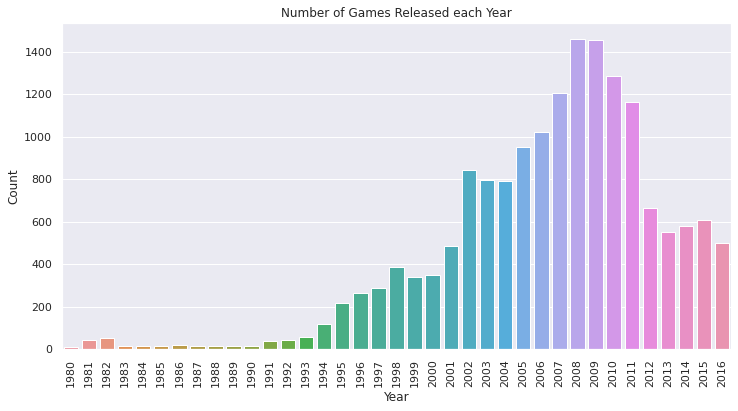

In [ ]:
# Menampilkan diagram jumlah game dirilis per tahun
plt.figure(figsize=(12,6))
ax = sns.barplot(data=game_count_per_year, x='release_year', y='count')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Number of Games Released each Year')
plt.xticks(rotation=90)
plt.show()

Temuan:
- Tahun **1980** sampai **1994** merupakan periode dimana jumlah game yang dirilis setiap tahun sangat sedikit, hal itu tidak mengherankan karena pada tahun-tahun tersebut platform game masih sangat sedikit jumlahnya, bahkan platform **ps1** baru dirilis pada tahun **1994**.
- Setelah tahun **1994** jumlah game yang dirilis terus meningkat setiap tahunnya.
- Puncak jumlah game yang dirilis terjadi pada tahun **2005** hingga **2011**, setidaknya tidak kurang dari **900** hingga **1400** game dirilis pada tahun-tahun tersebut, dan itu adalah periode dimana kemunculan platform **x360** dan **ps3**, dan kemungkinan banyak perusahaan yang membuat game.
- Periode **2012** sampai **2016**, jumlah game yang dirilis menurun sekitar **500**-an game game yang dirilis setiap tahunnya, hal itu mungkin terjadi karena banyak game yang penjualannya tidak sesuai target sehingga perusahaan lebih memilih untuk fokus membuat atau melanjutkan game-game yang populer saja. 

### Variasi Penjualan tiap Platform

In [ ]:
# Menampilkan jumlah penjualan tiap platform
platform_game_sales = df.groupby('platform').agg(global_sales=('global_sales','sum'), median=('global_sales',
                                            'median'), mean=('global_sales','mean'), count=('name',
                                            'count')).sort_values(by='global_sales', ascending=False).reset_index()

platform_game_sales

,platform,global_sales,median,mean,count
0,ps2,1255.77,0.230,0.581106,2161
1,x360,971.42,0.280,0.769746,1262
2,ps3,939.65,0.270,0.705973,1331
3,wii,907.51,0.190,0.687508,1320
4,ds,806.12,0.110,0.374765,2151
5,ps,730.86,0.260,0.610576,1197
6,gba,317.85,0.160,0.386679,822
7,ps4,314.14,0.200,0.801378,392
8,psp,294.05,0.090,0.243218,1209
9,pc,259.52,0.050,0.266448,974


Kita akan mengambil **6** platform dengan penjualan tertinggi yaitu:
- ps2
- x360
- ps3
- wii
- ds
- ps

Mari kita lihat distribusinya dalam diagram.

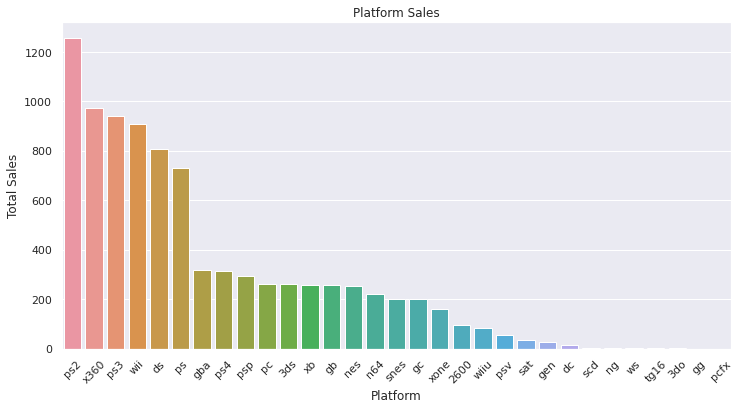

In [ ]:
# Menampilkan diagram penjualan game per platform sepanjang masa
plt.figure(figsize=(12,6))
ax = sns.barplot(data=platform_game_sales, x='platform', y='global_sales')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
ax.set_title('Platform Sales')
plt.xticks(rotation=45)
plt.show()

#### Memfilter 6 platform teratas

In [ ]:
# Memfilter data berdasarkan platform teratas
top_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

df_top_platform = df.query('platform in @top_platform').reset_index(drop=True)
df_top_platform.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91


In [ ]:
# Menampilkan dimensi data
df_top_platform.shape

(9422, 12)

In [ ]:
# Menampilkan distribusinya berdasarkan tahun
top_platform_sales_year = df_top_platform.groupby(['platform', 'release_year']).agg(global_sales=('global_sales',
                                            'sum'), median=('global_sales', 'median'), mean=('global_sales',
                                            'mean'), count=('name', 'count')).sort_values(by='global_sales',
                                            ascending=False).reset_index()
top_platform_sales_year

,platform,release_year,global_sales,median,mean,count
0,ps2,2004,217.93,0.310,0.783921,278
1,wii,2009,211.17,0.190,0.613866,344
2,ps2,2002,208.76,0.295,0.729930,286
3,ps2,2003,193.05,0.370,0.748256,258
4,wii,2008,177.68,0.215,0.621259,286
...,...,...,...,...,...,...
63,wii,2015,1.14,0.090,0.285000,4
64,ps2,2011,0.45,0.060,0.064286,7
65,ps3,2005,0.19,0.190,0.190000,1
66,wii,2016,0.18,0.180,0.180000,1


In [ ]:
# Memeriksa nilai unik tahun top_platform dataset
df_top_platform['release_year'].sort_values().unique()

array([1985, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016])

Ada tahun yang tidak wajar dari platform **ds** yaitu **1985** mari kita periksa lebih lanjut.

In [ ]:
# Memeriksa paltform 3ds di tahun 1985
df_top_platform.loc[(df_top_platform['platform'] == 'ds') & (df_top_platform['release_year'] == 1985)]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
9115,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,58.0,6.9,n/a,0.02


Setelah kita telusuri *value* anomali hanya terjadi pada satu baris.

Setelah kita mencarinya di *google* kita mendapati bahwa game **strongest tokyo university shogi ds** dirilis pada tahun **2010** maka kita akan menggantinya dengan *value* tersebut.	

In [ ]:
# Mengganti value tahun anomali dari semua dataset
df.loc[df['name'] == 'strongest tokyo university shogi ds', 'release_year'] = 2010
df_top_platform.loc[df_top_platform['name'] == 'strongest tokyo university shogi ds', 'release_year'] = 2010

In [ ]:
# Memasukkan kembali ke dalam pivot table
top_platform_sales_year = df_top_platform.groupby(['platform', 'release_year']).agg(global_sales=('global_sales',
                                            'sum'), median=('global_sales', 'median'), mean=('global_sales',
                                            'mean'), count=('name', 'count')).sort_values(by='global_sales',
                                            ascending=False).reset_index()

top_platform_unique = df_top_platform['release_year'].sort_values().unique()
top_platform_unique

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

Kita sudah membuang tahun anomali, selanjutnya kita akan menampilkan distribusinya dalam diagram.

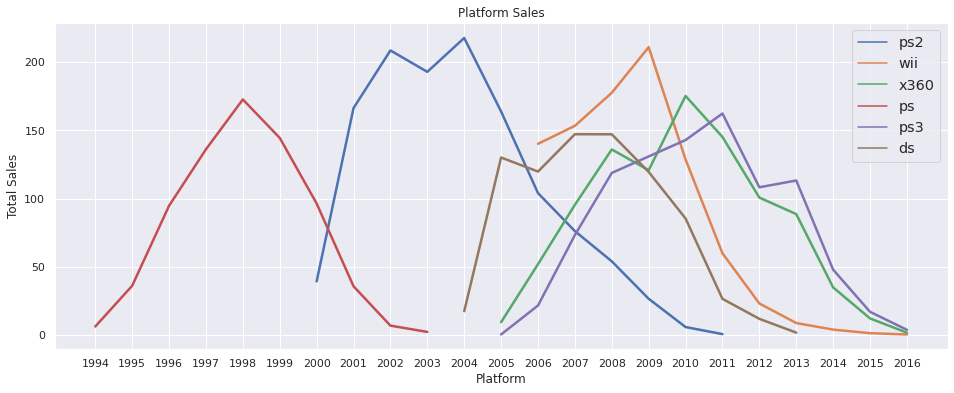

In [ ]:
# Menampilkan distribusi penjualan games dari populer platform tiap tahun
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=top_platform_sales_year, x='release_year', y='global_sales', hue='platform', lw=2.5)
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
ax.set_title('Platform Sales')
plt.xticks(top_platform_unique)
plt.legend(fontsize='large')
plt.show()

Temuan:
- *Lifespan* untuk tiap platform lebih-kurang sekitar **10** tahun sebelum mereka benar-benar mati.
- Platform yang dulunya populer namun sekarang tidak memiliki penjualan apapun yaitu **ps**, **ps2**, dan **ds**. Hal ini terjadi karena saat *company* menyadari popularitas dari penjualan mulai menurun mereka akan meluncurkan platform baru hingga platform sebelumnya tidak memiliki penjualan karena para *developer* game lebih memilih mengembangkan game untuk platform terbaru. 
- Untuk produsen seperti **ps**, mereka mengeluarkan platform *next gen* mereka kurang lebih sekitar **5 - 6** tahun setelah peluncuran platform pendahulunya.
- Puncak penjualan game terjadi setelah **5** tahun peluncuran suatu platform, tetapi hal unik tejadi pada platform **wii** karena penjualan game untuk platform mereka sudah sangat tinggi pada tahun pertama dirilis.

### Menentukan Data untuk Tahun Acuan 2017

Seperti temuan kita pada analisis sebelumnya bahwa suatu platform akan mengalami puncak penjualan game pada saat **5** setelah peluncuran jadi kita akan menetapkan tahun untuk analisa **3 - 4** tahun sebelumnya untuk melihat platform mana yang mulai bertumbuh dan platform mana yang sudah mulai menurun penjualannya.

In [ ]:
# Menentukan tahun analisa dimulai dari tahun 2013
df_recent = df.query('release_year >= 2013').reset_index(drop=True)
df_recent.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.20,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.10,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,76.0,6.85,n/a,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,77.0,8.10,n/a,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.30,m,12.62


In [ ]:
# Menampilkan distribusi tiap platform berdasarkan tahun
df_recent_pivot = df_recent.groupby(['platform', 'release_year']).agg(global_sales=('global_sales','sum'), 
                                            median=('global_sales','median'), mean=('global_sales','mean'),
                                            count=('name','count')).reset_index()

df_recent_pivot

,platform,release_year,global_sales,median,mean,count
0,3ds,2013,57.04,0.095,0.594167,96
1,3ds,2014,43.76,0.090,0.547000,80
2,3ds,2015,27.78,0.090,0.323023,86
3,3ds,2016,15.14,0.080,0.329130,46
4,ds,2013,1.54,0.150,0.192500,8
5,pc,2013,12.66,0.175,0.316500,40
6,pc,2014,13.28,0.100,0.282553,47
7,pc,2015,8.52,0.080,0.170400,50
8,pc,2016,5.25,0.035,0.097222,54
9,ps3,2013,113.25,0.310,0.898810,126


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great! inilah yang saya maksud dengan **[Code need to optimize](#redudant_code_need_to_optimize)**

</div>

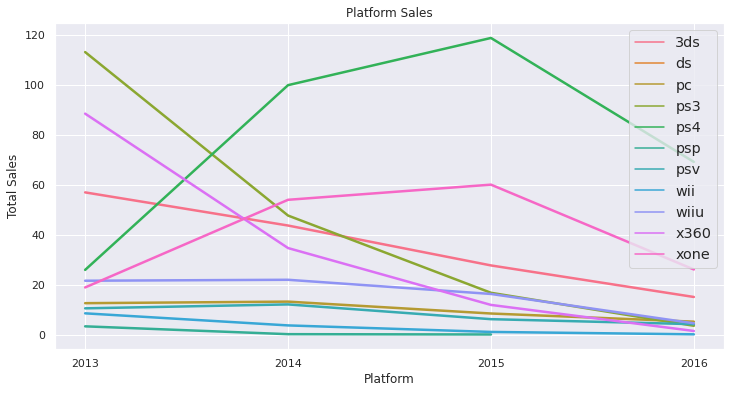

In [ ]:
# Menampilkan distribusi penjualan games dari recent_year tiap tahun
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_recent_pivot, x='release_year', y='global_sales', hue='platform', lw=2.5)
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
ax.set_title('Platform Sales')
plt.xticks([2013, 2014, 2015, 2016])
plt.legend(fontsize='large')
plt.show()

Temuan:
- Berdasarkan penemuan kita sebelumnya platform **ps4** dan **xone** seharusnya menunjukan kenaikan karena sedang tahap bertumbuh pada tahun ketiga mereka setelah dirilis, tetapi berdasarkan diagram menunjukan penurunan maka bisa kita anggap tahun **2016** data penjualannya masih belum sampai akhir tahun atau belum dapat dijadikan acuan.
- Beberapa platform bahkan sudah menunjukan gejala akan menuju pada akhir *lifespan*-nya dan mendekati angka penjualan hampir **0**
- Platform seperti **3ds** masih bisa menghasilkan angka penjualan yang cukup tinggi meskipun grafik dari platform tersebut menunjukan penurunan sejak tahun **2013**.

Decision:
- Kita memutuskan untuk memilih **3** platform yaitu **ps4**, **xone**, dan **3ds** yang berpotensi menghasilkan keuntungan.

### Menampilkan Boxplot dari Penjualan Games tiap Platform

In [ ]:
# Menampilkan jumlah penjualan tiap platform
platform_recent_sales = df_recent.groupby('platform').agg(global_sales=('global_sales','sum'), 
                                            median=('global_sales','median'), mean=('global_sales','mean'),
                                            count=('name','count')).sort_values(by='global_sales',
                                            ascending=False).reset_index()

platform_recent_sales

,platform,global_sales,median,mean,count
0,ps4,314.14,0.200,0.801378,392
1,ps3,181.43,0.150,0.525884,345
2,xone,159.32,0.220,0.645020,247
3,3ds,143.72,0.090,0.466623,308
4,x360,136.80,0.265,0.735484,186
5,wiiu,64.63,0.200,0.562000,115
6,pc,39.71,0.080,0.207906,191
7,psv,33.25,0.040,0.092618,359
8,wii,13.66,0.180,0.593913,23
9,psp,3.74,0.020,0.055000,68


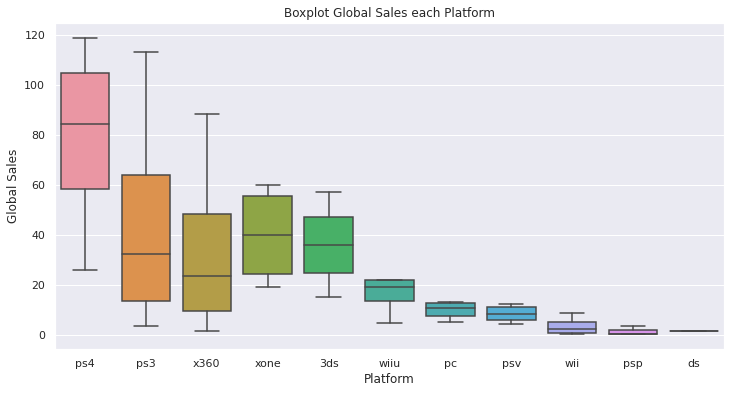

In [ ]:
# Menampilkan boxplot dari penjualan tiap platform
df_recent_pivot = df_recent_pivot.sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_recent_pivot, x='platform', y='global_sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Boxplot Global Sales each Platform')
plt.show()

- Platform **ps4** memiliki penjualan tertinggi dan selain karena jumlah game yang lebih banyak penghasilan/harga tiap gamenya juga lebih rendah dibandingkan **xone**. 
- Meskipun **ps3** dan **x360** menghasilkan angka penjualan yang cukup tinggi, tetapi kita melihat bahwa tren penjualan sudah sangat menurun mendekati tidak ada penjualan sama sekali.
- Platform **xone** dan **3ds** masih memberikan penghasilan yang cukup besar bagi toko kita.

### Menganalisa Apakah Ulasan Pengguna dan Kritikus Memengaruhi Penjualan dari Suatu Game

Kita akan memilih platform yang paling populer yaitu **ps4** untuk kita analisa korelasinya antara ulasan pengguna dan kritikus terhadap penjualan game-game di platform tersebut.

In [ ]:
# Memfilter untuk platform ps4
df_ps4 = df_recent.query('platform == "ps4"').reset_index(drop=True)
df_ps4.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,76.0,6.85,n/a,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.30,m,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.30,e,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,76.0,6.85,n/a,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.70,m,7.66


In [ ]:
# Menampilkan dimensi data
df_ps4.shape

(392, 12)

In [ ]:
# Menampilkan tabel korelasi data user review dan professiona review terhadap penjualan
sales_review_corr = df_ps4[['global_sales', 'critic_score', 'user_score']]
sales_review_corr.corr()

,global_sales,critic_score,user_score
global_sales,1.000000,0.326522,-0.057696
critic_score,0.326522,1.000000,0.543543
user_score,-0.057696,0.543543,1.000000



Correlation between critic_score and Sales : 0.32652207194520944


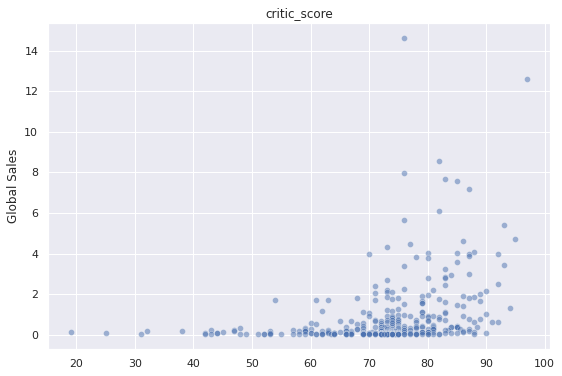



Correlation between user_score and Sales : -0.057696036227444444


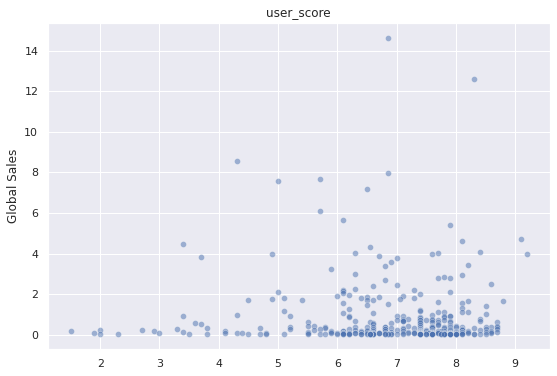

In [ ]:
# Membuat fungsi scatterplot data user review dan professional review terhadap penjualan
review = [ 'critic_score', 'user_score']

for column in review:
    print()
    print('Correlation between', column, 'and Sales', ':', df_ps4[column].corr(df_ps4['global_sales']))
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=df_ps4[column], y=df_ps4['global_sales'], data=df_ps4, alpha=0.5)
    plt.xlabel('')
    plt.ylabel('Global Sales')
    plt.title(column)
    plt.show() 
    print()

Temuan:
- Data dari `critic_score` terhadap `global_sales` menunjukan korelasi yang tidak terlalu signifikan yaitu sebesar **0.3**, artinya ulasan professional tidak terlalu memengaruhi keputusan konsumen dalam membeli sebuah judul game. 
- Hasil lainnya dari `user_score` terhadap `global_sales` juga menunjukan adanya korelasi negatif menengah yaitu sebesar **-0.5**, artinya ulasan pengguna tidak terlalu memengaruhi keputusan konsumen lainnya dalam membeli suatu judul game.

### Membandingkan Penjualan Game yang sama antar Platform

In [ ]:
# Memfilter berdasarkan Platform teratas
top_console = ['ps4', 'ps3', 'x360', 'xone', '3ds']

df_top_platform_recent = df_recent.query('platform in @top_console').reset_index(drop=True)
df_top_platform_recent.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.20,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.10,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,76.0,6.85,n/a,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,77.0,8.10,n/a,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.30,m,12.62


In [ ]:
# Memeriksa dimensi data
df_top_platform_recent.shape

(1478, 12)

In [ ]:
# Membuat pivot tabel data penjualan game antar platform
cross_platform_sales = df_top_platform_recent.pivot_table(values='global_sales', index='name', columns='platform',
                                                          aggfunc='sum').sort_values(by='ps3', 
                                                          ascending=False).dropna()
cross_platform_sales

platform,3ds,ps3,ps4,x360,xone
name,,,,,
fifa 14,0.23,6.46,3.01,4.22,1.16
fifa 15,0.46,4.28,6.08,2.92,2.18
lego marvel super heroes,0.89,1.83,1.62,2.22,1.05
skylanders swap force,0.24,1.02,0.38,1.32,0.31
the lego movie videogame,0.69,0.93,0.67,1.27,0.53
lego jurassic world,0.62,0.85,0.90,0.87,0.66
lego batman 3: beyond gotham,0.45,0.73,0.92,0.89,0.44
skylanders: trap team,0.28,0.67,0.44,0.89,0.37
lego the hobbit,0.24,0.46,0.60,0.45,0.27


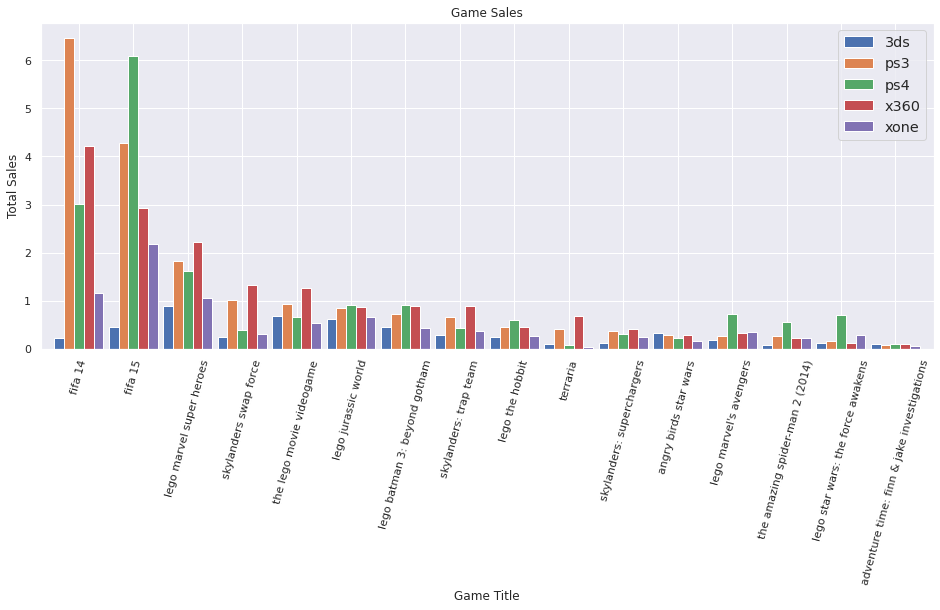

In [ ]:
# Menampilkan diagram market share game
cross_platform_sales.plot(kind='bar', figsize=(16, 6), width=0.9)
plt.xlabel('Game Title')
plt.ylabel('Total Sales')
plt.title('Game Sales')
plt.legend(fontsize='large')
plt.xticks(rotation=75)
plt.show()

Temuan:
- Platform **ps3**, **x360**, dan **ps4**, selalu menghasilkan penjualan tertinggi dari game-game yang ada diatas.
- Tetapi perlu diingat bahwa platform **ps3**, dan **x360** angka pejualan yang semakin terjun bebas tidak dapat kita abaikan.

### Distribusi Game Berdasarkan Genre

In [ ]:
# Memfilter berdasarkan genre
df_genre_recent = df_recent.groupby('genre').agg(global_sales=('global_sales','sum'), median=('global_sales',
                                            'median'), mean=('global_sales','mean'), count=('name',
                                            'count')).sort_values(by='global_sales', 
                                            ascending=False).reset_index()
df_genre_recent

,genre,global_sales,median,mean,count
0,action,322.15,0.110,0.419466,768
1,shooter,233.05,0.445,1.239628,188
2,sports,150.65,0.240,0.703972,214
3,role-playing,146.18,0.125,0.497211,294
4,misc,63.06,0.105,0.404231,156
5,platform,42.63,0.225,0.576081,74
6,racing,39.98,0.115,0.464884,86
7,fighting,35.31,0.125,0.441375,80
8,adventure,23.73,0.030,0.096463,246
9,simulation,21.95,0.100,0.348413,63


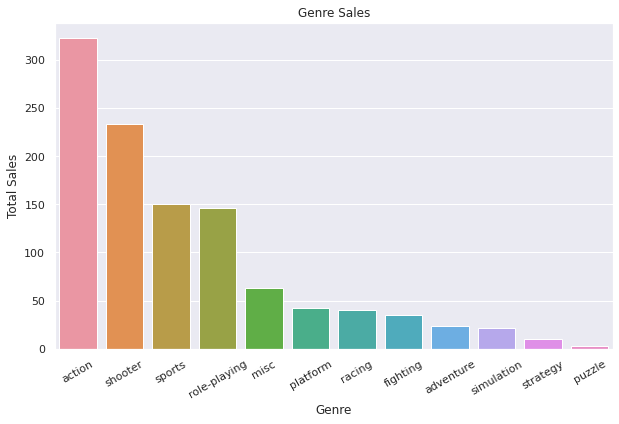

In [ ]:
# Menampilkan distribusi penjualan berdasarkan genre
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_genre_recent, x='genre', y='global_sales')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales')
ax.set_title('Genre Sales')
plt.xticks(rotation=30)
plt.show()

Temuan:
- Genre **action** dengan jumlah game **769** menghasilkan angka penjualan tertinggi dengan rata-rata penghasilan per gamenya **0.110**.
- Menariknya genre **shooter** dengan jumlah game yang rasionya jauh dibawah genre **action** bisa menempati peringkat kedua dengan rata-rata pendapatan dari tiap game sebesar **0.445** atau **400%** dari rata-rata penghasilan genre **action**.
- Lima genre teratas untuk penjualan adalah **action**, **shooter**, **sports**, **role-playing**, dan **misc**.

Saran:
- Untuk genre **action** lebih baik untuk menjual game-game dengan judul popular saja.

## Pemfrofilan untuk masing-masing Wilayah

Untuk setiap wilayah (NA, EU, JP), tentukan:
- 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
- 5 genre teratas. Jelaskan perbedaannya.
- Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [ ]:
# Menampilkan sample dataset
df_recent.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.20,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.10,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,76.0,6.85,n/a,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,77.0,8.10,n/a,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.30,m,12.62


### Menentukan 5 Platform teratas masing-masing Region

#### 5 Platform teratas Region NA

In [ ]:
# Memfilter berdasarkan platform wilayah NA
na_top_platform = df_recent.groupby('platform').agg(na_sales=('na_sales','sum'), global_sales=('global_sales',
                                            'sum'), na_median=('na_sales','median'), na_mean=('na_sales','mean'),
                                            na_count=('name','count')).sort_values(by='na_sales', 
                                            ascending=False).reset_index()
na_top_platform.head()

,platform,na_sales,global_sales,na_median,na_mean,na_count
0,ps4,108.74,314.14,0.06,0.277398,392
1,xone,93.12,159.32,0.12,0.377004,247
2,x360,81.66,136.80,0.15,0.439032,186
3,ps3,63.50,181.43,0.03,0.184058,345
4,3ds,38.58,143.72,0.00,0.125260,308


Temuan:
- Untuk wilayah **NA** platform dengan penjualan terbanyak adalah **ps4** dengan angka **108**.
- Untuk **5** platform teratas yaitu **ps4**, **xone**, **x360**, **ps3**, dan **3ds**.

#### 5 Platform teratas Region EU

In [ ]:
# Memfilter berdasarkan platform wilayah EU
eu_top_platform = df_recent.groupby('platform').agg(eu_sales=('eu_sales','sum'), global_sales=('global_sales',
                                            'sum'), eu_median=('eu_sales','median'), eu_mean=('eu_sales','mean'),
                                            eu_count=('name','count')).sort_values(by='eu_sales', 
                                            ascending=False).reset_index()
eu_top_platform.head()

,platform,eu_sales,global_sales,eu_median,eu_mean,eu_count
0,ps4,141.09,314.14,0.08,0.359923,392
1,ps3,67.81,181.43,0.02,0.196551,345
2,xone,51.59,159.32,0.07,0.208866,247
3,x360,42.52,136.80,0.08,0.228602,186
4,3ds,30.98,143.72,0.00,0.100584,308


Temuan:
- Untuk wilayah **EU** platform dengan penjualan terbanyak adalah **ps4** dengan angka **141**, berbeda dengan wilayah **NA** perbedaan penjualan platform peringkat pertama dan kedua cukup signifikan dengan selisih lebih dari setengahnya.
- Untuk **5** platform teratas yaitu **ps4**, **ps3**, **xone**, **x360**, dan **3ds**.

#### 5 Platform teratas Region JP

In [ ]:
# Memfilter berdasarkan platform wilayah NA
jp_top_platform = df_recent.groupby('platform').agg(jp_sales=('jp_sales','sum'), global_sales=('global_sales',
                                            'sum'), jp_median=('jp_sales','median'), jp_mean=('jp_sales','mean'),
                                            jp_count=('name','count')).sort_values(by='jp_sales', 
                                            ascending=False).reset_index()
jp_top_platform.head()

,platform,jp_sales,global_sales,jp_median,jp_mean,jp_count
0,3ds,67.84,143.72,0.055,0.220260,308
1,ps3,23.35,181.43,0.030,0.067681,345
2,psv,18.66,33.25,0.030,0.051978,359
3,ps4,15.96,314.14,0.010,0.040714,392
4,wiiu,10.88,64.63,0.000,0.094609,115


Temuan:
- Berbeda dengan wilayah **NA** dan **EU** untuk wilayah **JP** platform dengan penjualan terbanyak adalah **3ds** dengan angka **143**, angka tersebut sangat jauh selisihnya dengan peringkat dua dan seterusnya.
- Cukup menarik untuk wilayah **JP** karena platform **ps4** yang menjadi puncak penjualan game pada dua wilayah sebelumnya yaitu **NA** dan **EU** hanya menempati peringkat **4** di wilayah ini.
- Untuk **5** platform teratas yaitu **3ds**, **ps3**, **psv**, **ps4**, dan **wiiu**.

#### Variasi Market Shares Platform

In [ ]:
# Membuat pivot tabel market share berdasarkan platform ketiga wilayah
top_platform_share = df_recent.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='platform', 
                                            aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
top_platform_share

,platform,eu_sales,jp_sales,na_sales
0,ps4,141.09,15.96,108.74
1,xone,51.59,0.34,93.12
2,x360,42.52,0.51,81.66
3,ps3,67.81,23.35,63.50
4,3ds,30.98,67.84,38.58
5,wiiu,19.85,10.88,29.21
6,pc,25.59,0.00,11.13
7,wii,5.93,0.05,6.56
8,psv,6.15,18.66,5.15
9,ds,0.85,0.00,0.57


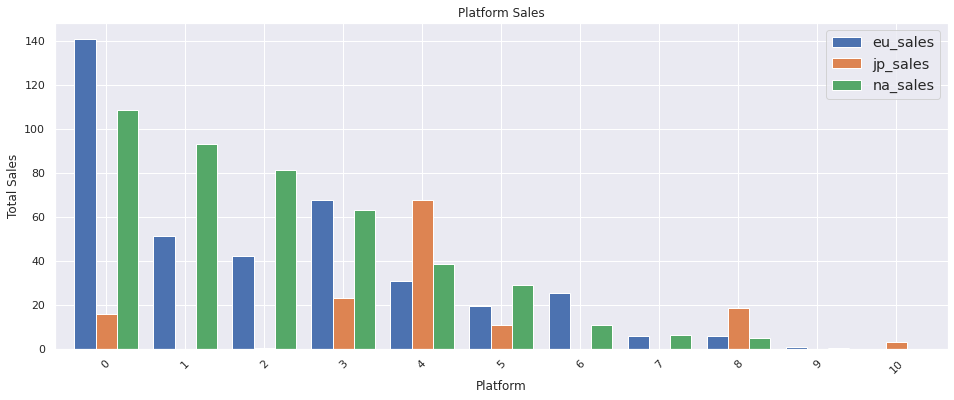

In [ ]:
# Menampilkan diagram market share game ketiga wilayah tiap platform
top_platform_share.plot(kind='bar', figsize=(16, 6), width=0.8)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Platform Sales')
plt.legend(fontsize='large')
plt.xticks(rotation=45)
plt.show()

Temuan:

- Untuk wilayah **NA** platform dengan penjualan terbanyak adalah **ps4** dengan angka **108**.
- Untuk **5** platform teratas yaitu **ps4**, **xone**, **x360**, **ps3**, dan **3ds**.

EU:
- Untuk wilayah **EU** platform dengan penjualan terbanyak adalah **ps4** dengan angka **141**, berbeda dengan wilayah **NA** perbedaan penjualan platform peringkat pertama dan kedua cukup signifikan dengan selisih lebih dari setengahnya.
- Untuk **5** platform teratas yaitu **ps4**, **ps3**, **xone**, **x360**, dan **3ds**.

JP:
- Berbeda dengan wilayah **NA** dan **EU** untuk wilayah **JP** platform dengan penjualan terbanyak adalah **3ds** dengan angka **143**, angka tersebut sangat jauh selisihnya dengan peringkat dua dan seterusnya.
- Cukup menarik untuk wilayah **JP** karena platform **ps4** yang menjadi puncak penjualan game pada dua wilayah sebelumnya yaitu **NA** dan **EU** hanya menempati peringkat **4** di wilayah ini.
- Untuk **5** platform teratas yaitu **3ds**, **ps3**, **psv**, **ps4**, dan **wiiu**.

Rekomendasi:
- Tentunya dengan penemuan diatas kita bisa mengambil keputusan untuk melakuan promosi dan memperbanyak penjualan pada game dengan platform paling populer pada masing-masing region diatas.

### Top 5 Genre di masing-masing Wilayah

#### Top 5 Genre Region NA

In [ ]:
# Memfilter berdasarkan genre wilayah NA
na_top_genre = df_recent.groupby('genre').agg(na_sales=('na_sales','sum'), global_sales=('global_sales','sum'),
                                            na_median=('na_sales','median'), na_mean=('na_sales','mean'),
                                            na_count=('name','count')).sort_values(by='na_sales', 
                                            ascending=False).reset_index()
na_top_genre.head()

,genre,na_sales,global_sales,na_median,na_mean,na_count
0,action,126.07,322.15,0.02,0.164154,768
1,shooter,109.78,233.05,0.20,0.583936,188
2,sports,65.27,150.65,0.08,0.305000,214
3,role-playing,46.51,146.18,0.02,0.158197,294
4,misc,27.49,63.06,0.01,0.176218,156


Temuan:
- Para konsumen di wilayah **NA**, lebih menyukai game-game dengan genre **action** dan penjualan genre tersebut pada wilayah ini mencapai **126**.
- Untuk genre lainnya pada wilayah **NA** memiliki selisih yang tidak terlalu jauh antara satu peringkat dengan peringkat lainnya.
- Urutan genre pada wilayah **NA** berurutan dari yang tertingi adalah **action**, **shooter**, **sports**, **role-playing**, dan **misc**.

#### Top 5 Genre Region EU

In [ ]:
# Memfilter berdasarkan genre wilayah EU
eu_top_genre = df_recent.groupby('genre').agg(eu_sales=('eu_sales','sum'), global_sales=('global_sales','sum'),
                                            eu_median=('eu_sales','median'), eu_mean=('eu_sales','mean'),
                                            eu_count=('name','count')).sort_values(by='eu_sales', 
                                            ascending=False).reset_index()
eu_top_genre.head()

,genre,eu_sales,global_sales,eu_median,eu_mean,eu_count
0,action,118.36,322.15,0.020,0.154115,768
1,shooter,87.88,233.05,0.185,0.467447,188
2,sports,60.52,150.65,0.050,0.282804,214
3,role-playing,37.02,146.18,0.010,0.125918,294
4,racing,20.19,39.98,0.055,0.234767,86


Temuan:
- Para konsumen di wilayah **EU**, lebih menyukai game-game dengan genre **action** dan penjualan genre tersebut pada wilayah ini mencapai **118**, distribusi genre antara region **NA** dan **EU** juga tidak terdapat perbedaan yang signifikan.
- Untuk genre lainnya pada wilayah **EU** juga mirip memiliki selisih yang tidak terlalu jauh antara satu peringkat dengan peringkat lainnya.
- Urutan genre pada wilayah **EU** sedikit berbeda dari wilyah **NA** dengan urutan dari yang tertingi adalah **action**, **shooter**, **sports**, **role-playing**, dan **racing**.

#### Top 5 Genre Region JP

In [ ]:
# Memfilter berdasarkan genre wilayah JP
jp_top_genre = df_recent.groupby('genre').agg(jp_sales=('jp_sales','sum'), global_sales=('global_sales','sum'),
                                            jp_median=('jp_sales','median'), jp_mean=('jp_sales','mean'),
                                            jp_count=('name','count')).sort_values(by='jp_sales', 
                                            ascending=False).reset_index()
jp_top_genre.head()

,genre,jp_sales,global_sales,jp_median,jp_mean,jp_count
0,role-playing,51.14,146.18,0.05,0.173946,294
1,action,40.49,322.15,0.01,0.052721,768
2,misc,9.44,63.06,0.02,0.060513,156
3,fighting,7.65,35.31,0.03,0.095625,80
4,shooter,6.61,233.05,0.00,0.035160,188


Temuan:
- Para konsumen di wilayah **JP**, memiliki keunikan tersendiri mereka lebih menyukai game-game dengan genre **role-playing** meskipun genre **action** berada di urutan kedua tetapi selisih kedua genre tersebut sangat jauh daripada genre lainnya, penjualan kedua genre tersebut pada wilayah ini mencapai **51** dan **40**.
- Urutan genre pada wilayah **JP** sangat berbeda dari wilyah **NA** dan wilayah **EU** dengan urutan dari yang tertingi adalah  **role-playing**, **action**, **misc**, **fighting**, dan **shooter**.

#### Variasi Market Shares Genre

In [ ]:
# Membuat pivot tabel market share berdasarkan genre ketiga wilayah
top_genre_share = df_recent.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='genre', 
                                        aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
top_genre_share

,genre,eu_sales,jp_sales,na_sales
0,action,118.36,40.49,126.07
1,shooter,87.88,6.61,109.78
2,sports,60.52,5.41,65.27
3,role-playing,37.02,51.14,46.51
4,misc,20.04,9.44,27.49
5,platform,15.58,4.79,18.14
6,fighting,8.55,7.65,15.55
7,racing,20.19,2.30,13.04
8,adventure,8.25,5.82,7.22
9,simulation,10.92,4.52,5.04


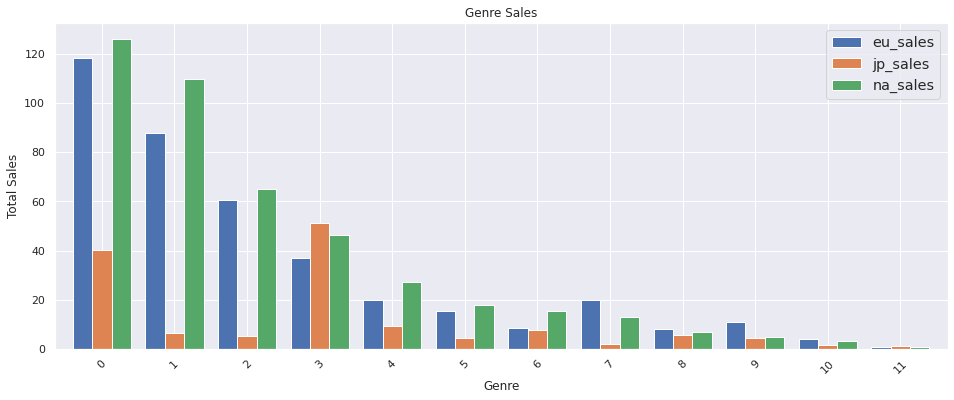

In [ ]:
# Menampilkan diagram market share game ketiga wilayah tiap platform
top_genre_share.plot(kind='bar', figsize=(16, 6), width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Genre Sales')
plt.legend(fontsize='large')
plt.xticks(rotation=45)
plt.show()

Temuan:

NA:
- Para pengguna wilayah **NA** sangat menyukai game-game dengan genre **action**, dan **shooter**.
- Urutan genre pada wilayah **NA** berurutan dari yang tertingi adala **action**, **shooter**, **sports**, **role-playing**, dan **misc**.

EU:
- Tidak jauh berbeda dengan wilayah **NA** di wilayah **EU** pengguna sangat menyukai game-game dengan genre **action**, tetapi sedikit berbeda pada urutan kelima, mereka lebih menyukai genre **racing**, sementara pengguna di region **NA** lebih menyukai genre **misc**.
- Urutan genre pada wilayah **EU** sedikit berbeda dari wilyah **NA** dengan urutan dari yang tertingi adalah **action**, **shooter**, **sports**, **role-playing**, dan **racing**.

JP:
- Untuk karakteristik pengguna di wilayah **JP** memiliki perbedaan yang sangat jauh dibandingkan dengan dua wilayah sebelumnya mereka sangat menyukai game dengan genre **role-plating** dan **action** tetapi sangat sedikit peminat untuk genre lainnya .
- Urutan genre pada wilayah **JP** sangat berbeda dari wilyah **NA** dan wilayah **EU** dengan urutan dari yang tertingi adalah  **role-playing**, **action**, **misc**, **fighting**, dan **shooter**.

Rekomendasi:
- Kita bisa memperbanyak promosi untuk penjualan game-game dengan genre populer pada masing-masing wilayah.

### Top Rating di masing-masing Wilayah

#### Top Rating Region NA

In [ ]:
# Memfilter berdasarkan rating wilayah NA
na_top_rating = df_recent.groupby('rating').agg(na_sales=('na_sales','sum'), global_sales=('global_sales','sum'),
                                            na_median=('na_sales','median'),na_mean=('na_sales','mean'),
                                            na_count=('name','count')).sort_values(by='na_sales', 
                                            ascending=False).reset_index()
na_top_rating.head()

,rating,na_sales,global_sales,na_median,na_mean,na_count
0,m,175.12,397.81,0.12,0.413995,423
1,e,81.80,206.47,0.05,0.256426,319
2,n/a,72.54,232.53,0.00,0.084941,854
3,e10+,56.49,121.20,0.11,0.210784,268
4,t,52.27,133.93,0.03,0.138280,378


Temuan: 
- Pengguna di region **NA** lebih banyak berasal dari kelompok usia **Mature/ 17+**.
- Rata-rata harga/pendapatan untuk game dengan genre **M** lebih tinggi daripada genre lainnya.

#### Top Rating Region EU

In [ ]:
# Memfilter berdasarkan rating wilayah EU
eu_top_rating = df_recent.groupby('rating').agg(eu_sales=('eu_sales','sum'), global_sales=('global_sales','sum'),
                                            eu_median=('eu_sales','median'), eu_mean=('eu_sales','mean'),
                                            eu_count=('name','count')).sort_values(by='eu_sales', 
                                            ascending=False).reset_index()
eu_top_rating.head()

,rating,eu_sales,global_sales,eu_median,eu_mean,eu_count
0,m,156.90,397.81,0.12,0.370922,423
1,e,85.49,206.47,0.05,0.267994,319
2,n/a,61.19,232.53,0.00,0.071651,854
3,e10+,45.22,121.20,0.10,0.168731,268
4,t,43.73,133.93,0.03,0.115688,378


Temuan: 
- Pengguna di region **NA** lebih banyak berasal dari kelompok usia **Mature/ 17+**.
- Rata-rata harga/pendapatan untuk game dengan genre **M** lebih tinggi daripada genre lainnya.

#### Top Rating Region JP

In [ ]:
# Memfilter berdasarkan rating wilayah JP
jp_top_rating = df_recent.groupby('rating').agg(jp_sales=('jp_sales','sum'), global_sales=('global_sales','sum'),
                                            jp_median=('jp_sales','median'), jp_mean=('jp_sales','mean'),
                                            jp_count=('name','count')).sort_values(by='jp_sales', 
                                            ascending=False).reset_index()
jp_top_rating.head()

,rating,jp_sales,global_sales,jp_median,jp_mean,jp_count
0,n/a,80.85,232.53,0.03,0.094672,854
1,t,22.91,133.93,0.02,0.060608,378
2,e,15.98,206.47,0.00,0.050094,319
3,m,15.11,397.81,0.00,0.035721,423
4,e10+,6.27,121.20,0.00,0.023396,268


Temuan: 
- Pengguna di region **JP** lebih banyak berasal dari kelompok usia **Teen/ 13+**.
- Rata-rata harga/pendapatan untuk game dengan genre **T** lebih tinggi daripada genre lainnya.

#### Variasi Market Shares Rating

In [ ]:
# Membuat pivot tabel market share berdasarkan rating ketiga wilayah
top_rating_share = df_recent.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='rating', 
                                        aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
top_rating_share

,rating,eu_sales,jp_sales,na_sales
0,m,156.90,15.11,175.12
1,e,85.49,15.98,81.80
2,n/a,61.19,80.85,72.54
3,e10+,45.22,6.27,56.49
4,t,43.73,22.91,52.27


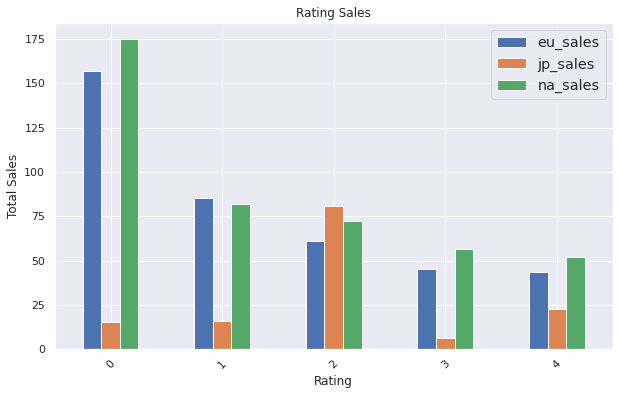

In [ ]:
# Menampilkan diagram market share game ketiga wilayah tiap platform
top_rating_share.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title('Rating Sales')
plt.legend(fontsize='large')
plt.xticks(rotation=45)
plt.show()

Temuan: 
- Pengguna di region **NA** dan region **EU** meiliki karatakteristik yang mirip mereka lebih banyak berasal dari kelompok usia **Mature/ 17+**, sementara untuk region **JP** pengguna lebih banyak berasal dari ketegori **Teen/ 13+**.
- Rata-rata harga/pendapatan di wilayah **NA** dan **EU** untuk game dengan genre **M** lebih tinggi daripada genre lainnya, sementara di wilayah **JP** rata-rata harga/pendapatan untuk kategori **T** lebuh tinggi.
- Jadi, pengguna lebih memilih game dengan berdasarkan kelompok umur mereka sendiri, kita bisa menjual game dengan harga lebih tinggi pada kelompok umur yang populer di masing-masing wilayah.

## Uji Hipotesis

### Rata-rata rating pengguna platform Xbox One dan PC adalah sama

**Hypothesis :**

- H₀ : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- H₁ : Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.

Alpha value - 5%

In [ ]:
# Memfilter dataset berdasarkan platform yang akan diuji
df_recent_xone = df_recent.query('platform == "xone"').reset_index(drop=True)
df_recent_pc = df_recent.query('platform == "pc"').reset_index(drop=True)

In [ ]:
# Membuat fungsi hisplot untuk menghindari pengulangan
def hisplot (a, b, c):
    plt.figure(figsize=(8,5))
    sns.histplot(a[b], bins=80, kde=True)
    plt.xlabel(b)
    plt.ylabel('game')
    plt.title(c)
    plt.show()

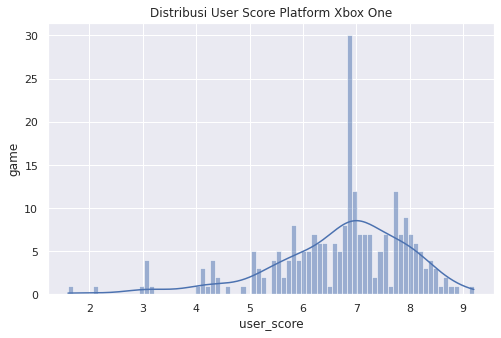

In [ ]:
# Memeriksa distribusi user_score platform Xbox One
hisplot(df_recent_xone, 'user_score', 'Distribusi User Score Platform Xbox One')

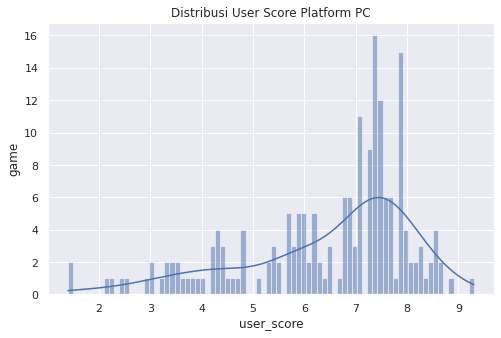

In [ ]:
# Memeriksa distribusi user_score platform Xbox One
hisplot(df_recent_pc, 'user_score', 'Distribusi User Score Platform PC')

Untuk menentukan `equal_var` True atau False kita akan menggunakan **Levene Test** karena seperti yang kita lihat kedua diagram menunjukan distribusi yang miring ke kiri atau **Non-normal Distribution**, kita menetapkan jika nilai `p-value` lebih dari **0.05** maka bisa kita asumsikan bahwa kedua sampel memiliki `equal variance`, kita juga menetapkan argumen `median` pada fungsi **center** karena seperti yang kita ketahui pada diagram kedua dataframe skewed to the left.

In [ ]:
# Determine if the two samples have equal or unequal variance
platform_var_levene = st.levene(df_recent_xone['user_score'], df_recent_pc['user_score'], center='median')
platform_var_levene 

LeveneResult(statistic=10.210150255217641, pvalue=0.001498149504853393)

Nilai `pvalue` menunjukkan angka **0.001**, maka kita bisa tetapkan kedua populasi memiliki varians yang berbeda, karena lebih rendah dari nilai **Alpha** yang ditentukan. 

In [ ]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_recent_xone['user_score'], df_recent_pc['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.12243579649898262
We can't reject the null hypothesis


Hasil dari uji yang kita lakukan menunjukan bahwa rata-rata `user_score` antara platform **xbox one** dan **pc** adalah sama atau kita tidak dapat menolak hipotesis **Nol**. Hal ini menunjukan bahwa platform tidak memengaruhi kepuasan pengguna terhadap suatu game.

### Rata-rata rating pengguna genre Action dan Sports berbeda

**Hypothesis :**

- H₀ : Rata-rata rating pengguna genre Action dan Sports tidak berbeda.
- H₁ : Rata-rata rating pengguna genre Action dan Sports berbeda.

Alpha value - 5%

In [ ]:
# Memfilter dataset berdasarkan genre yang akan diuji
df_recent_action = df_recent.query('genre == "action"').reset_index(drop=True)
df_recent_sports = df_recent.query('genre == "sports"').reset_index(drop=True)

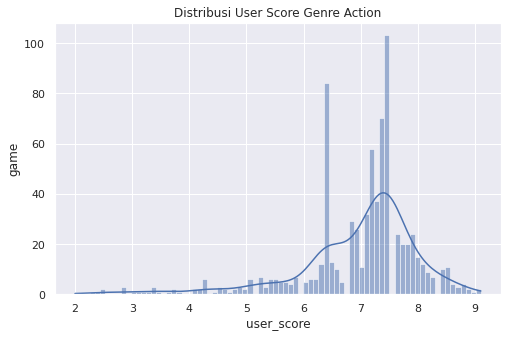

In [ ]:
# Memeriksa distribusi user_score genre action
hisplot(df_recent_action, 'user_score', 'Distribusi User Score Genre Action')

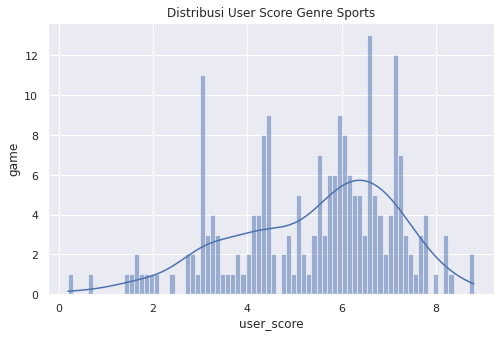

In [ ]:
# Memeriksa distribusi user_score genre sports
hisplot(df_recent_sports, 'user_score', 'Distribusi User Score Genre Sports')

Sama seperti pengujian yang kita lakukan sebelumnya untuk menentukan `equal_var` True atau False kita akan menggunakan **Levene Test** karena seperti yang kita lihat kedua diagram menunjukan distribusi yang miring ke kiri atau **Non-normal Distribution**, kita menetapkan jika nilai `p-value` lebih dari **0.05** maka bisa kita asumsikan bahwa kedua sampel memiliki `equal variance`, kita juga menetapkan argumen `median` pada fungsi **center** karena seperti yang kita ketahui pada diagram kedua dataframe skewed to the left.

In [ ]:
# Determine if the two samples have equal or unequal variance
genre_var_levene = st.levene(df_recent_action['user_score'], df_recent_sports['user_score'], center='median')
genre_var_levene 

LeveneResult(statistic=90.67027534161394, pvalue=1.279728684871236e-20)

Nilai `pvalue` menunjukkan angka **1.2**, maka kita bisa tetapkan kedua populasi memiliki varians yang sama, karena lebih tinggi dari nilai **Alpha** yang ditentukan. 

In [ ]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_recent_action['user_score'], df_recent_sports['user_score'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 2.763429591766702e-52
We reject the null hypothesis


Uji diatas yang telah kita lakukan menghasilkan bahwa kita menolak hipotesis **Nol** atau rata-rata `user_score` dari genre **action** dan **sports** berbeda. Hal ini menunjukan bahwa genre dari suatu game dapat memengaruhi kepuasan pengguna dalam membeli suatu game.

## Consclusion

**1. Preprocessing Data**
- Kita memulai dengan dataset kita yang berjumlah **16715** baris dan **11** kolom.
- Beberapa kolom terdapat *missing value* seperti kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`.
- Kita akan mengganti register dari nama-nama kolom dan nama-nama value dalam kolom menjadi huruf kecil untuk mempermudah dalam melakukan analisis.
- Kita mengubah tipe kolom `release_year` dan `user_score` menjadi tipe yang sesuai.
- Tidak ada duplikat ditemukan.

**2. Transformation Data**
- Kita membuat kolom baru yaitu `global_sales` untuk menghitung jumlah penjualan dari seluruh dunia.
- Kita memfilter data mulai tahun **2013** untuk memprediksi penjualan di tahun **2017**.

**3. Analisys dan Data Visualization**
- Periode **1980** sampai **1994** merupakan periode dimana game-game yang dirilis masih sangat sedikit karena belum banyak platform juga yang tersedia, setelah tahun **1994** dan seterusnya game-game mulai banyak diluncurkan setiap tahun dan mencapai *peak* pada periode **2005** sampai **2011**, dan setelah **2011** game-game yang diluncurkan mulai berkurang, alasannya mungkin karena platform yang lama mulai ditinggalkan dan pengguna beralih pada platform baru yang lebih modern sehingga, banyak perusahaan berhenti mengeluarkan game di banyak platform. 
- Kita mengetahui **6** platform teratas yaitu: **ps2**, **x360**, **ps3**, **wii**, **ds**, dan **ps**. Rata-rata *lifespan* tiap platform adalah **10** tahun, *peak* penjualan terjadi setelah **5** tahun diluncurkan sebuah platform sebelum kemudian mulai menurun, produsen mengeluarkan platform *next gen* mereka setelah **5** tahun peluncuran platform sebelumnya. 
- Kita mengambil data sejak tahun **2013** alasannya karena **3-4** tahun merupakan waktu suatu platform mulai bertumbuh dan mencapai puncak penjualan. 
- Sejak tahun **2013** platform dengan penjualan tertinggi adalah **ps4**. Kemudian ada **ps3**, **x360** tetapi angka penjualan kedua platform tersebut sudah sangat menurun mendekati angka **0**, selanjutnya ada **3ds** yang menghasilkan penjualan cukup tinggi meskipun platform tersebut menunjukkan tren penjualan yang menurun sejak **2013**. Platform **ps4** dan **xone** seharusnya sedang ada di masa menuju puncak penjualan game saat ini, kita bisa mengabaikan tahun **2016** karena belum lengkap. 
- Kita mendapati bahwa `critic_score` tidak memengaruhi penjualan suatu game, sedangkan `user_score` menunjukkan adanya pengaruh terhadap penjualan meskipun tidak terlalu signifikan. 
- Platform **ps3**, **x360**, dan **ps4**, selalu menghasilkan penjualan tertinggi dari game-game yang kita uji tetapi perlu diingat angka penjualan dari **ps3** dan **x360** sudah sangat menurun. 
- Lima genre teratas untuk penjualan adalah **action**, **shooter**, **sports**, **role-playing**, dan **misc**, tetapi untuk genre action karena jumlahnya sangat banyak rata-rata harga per gamenya tidak terlalu menguntungkan disarankan untuk menjual judul-judul yang populer saja dari genre **action**. 

**4. Karakteristik Pengguna di setiap Region**
- Untuk wilyah **NA** dan **EU** para pengguna memiliki karakteristik yang sama mereka menyukai platform **ps4**, **xone**, **x360**, **ps3**, dan **3ds**, sedangkan pada wilayah **JP** memiliki karakteristik sendiri, pengguna lebih bayak menggunakan platform **3ds** sehingga **ps4** hanya menempati peringkat ke **4** dari platform terpopuler. 
- Pengguna di region **NA** dan **EU** juga memiliki karakteristik yang serupa pada kelompok genre mereka menyukai **action**, **shooter**, **sports**,  dan **role-playing**, sedangkan di region **JP** mereka menyukai genre **role-playing** dan **action** dan hanya sedikit penjualan pada genre lainnya.  
- Pengguna di region **NA** dan region **EU** meiliki karatakteristik yang mirip mereka lebih banyak berasal dari kelompok usia **Mature/ 17+**, sementara untuk region **JP** pengguna lebih banyak berasal dari ketegori **Teen/ 13+**. Jadi, rating **ESRB** dapat memengaruhi penjualan game di suatu wilayah.
 
**5. Test Statistical Hypothesis**
- Hasil hipotesis pertama menunjukan bahwa rata-rata `user_score` antara platform **xbox one** dan **pc** adalah sama. Hal ini menunjukan bahwa platform tidak memengaruhi kepuasan pengguna terhadap suatu game.
- Hipotesis kedua mengungkapkan bahwa rata-rata `user_score` dari genre **action** dan **sports** berbeda. Hal ini menunjukan bahwa genre dari suatu game dapat memengaruhi kepuasan pengguna dalam membeli suatu game.

**6. Rekomendasi**
- Berdasarkan hasil analisis yang telah kita lakukan maka kita bisa memberikan rekomendasi untuk lebih banyak menjual game untuk platform **ps4** dan **xbox one** karena kita bisa memprediksikan bahwa kedua platform tersebut akan mencapai *peak* penjualan dalam **1 - 2** tahun mendatang, untuk platform **3ds** masih bisa menghasilkan penjulan untuk tahun berikutnya tetapi kita harus mengurangi persediannya, sementara sepertinya kita harus menutup penjualan untuk platform lain atau menjual game yang popular saja karena keuntungannya semakin kecil mendekati angka **0**.
- Untuk wilayah **North America** dan **Europe** game-game yang paling potensial berasal dari genre **Action** den kategori **Mature**, sedangkan di wilayah **Japan** kita akan mendapatkan lebih banyak penjulan dari game-game dengan genre **Role-playing** dan kategori **Teen**.